### ETHEREUM 

In [1]:
import requests
import pandas as pd
import datetime

# Function to fetch historical data for Ethereum
def fetch_ethereum_data(days=30):
    url = f"https://api.coingecko.com/api/v3/coins/ethereum/market_chart"
    params = {
        'vs_currency': 'usd',
        'days': days,  # Number of days (e.g., 30 for the last 30 days)
        'interval': 'daily',  # Data interval: daily
    }
    
    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            
            # Extract prices and volume
            prices = data['prices']
            volumes = data['total_volumes']
            
            # Process into a DataFrame
            eth_data = []
            for i in range(len(prices)):
                timestamp = datetime.datetime.fromtimestamp(prices[i][0] / 1000)  # Convert from ms to datetime
                open_price = prices[i][1] if i == 0 else prices[i - 1][1]  # Approximation
                close_price = prices[i][1]
                high_price = max(prices[i][1], close_price)  # Approximation
                low_price = min(prices[i][1], close_price)  # Approximation
                volume = volumes[i][1]
                
                eth_data.append([timestamp, open_price, high_price, low_price, close_price, volume])
            
            df = pd.DataFrame(eth_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
            return df
        else:
            print(f"Error: Unable to fetch data (status code: {response.status_code})")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Fetch Ethereum data for the last 30 days
eth_df = fetch_ethereum_data(days=30)

if eth_df is not None:
    print(eth_df.head())
    # Save the data to a CSV file
    eth_df.to_csv('ethereum_historical_data.csv', index=False)
    print("Ethereum data saved as 'ethereum_historical_data.csv'.")


            timestamp         open         high          low        close  \
0 2024-11-20 05:30:00  3112.909801  3112.909801  3112.909801  3112.909801   
1 2024-11-21 05:30:00  3112.909801  3075.193857  3075.193857  3075.193857   
2 2024-11-22 05:30:00  3075.193857  3365.936972  3365.936972  3365.936972   
3 2024-11-23 05:30:00  3365.936972  3327.757195  3327.757195  3327.757195   
4 2024-11-24 05:30:00  3327.757195  3394.036962  3394.036962  3394.036962   

         volume  
0  2.976725e+10  
1  2.950894e+10  
2  5.571413e+10  
3  3.653692e+10  
4  4.288542e+10  
Ethereum data saved as 'ethereum_historical_data.csv'.


In [2]:
df=pd.read_csv('../data/ethereum_historical_data.csv')

In [3]:
df.head()

,timestamp,open,high,low,close,volume
0,2024-11-19 05:30:00,3209.423907,3209.423907,3209.423907,3209.423907,3.536473e+10
1,2024-11-20 05:30:00,3209.423907,3112.909801,3112.909801,3112.909801,2.976725e+10
2,2024-11-21 05:30:00,3112.909801,3075.193857,3075.193857,3075.193857,2.950894e+10
3,2024-11-22 05:30:00,3075.193857,3365.936972,3365.936972,3365.936972,5.571413e+10
4,2024-11-23 05:30:00,3365.936972,3327.757195,3327.757195,3327.757195,3.653692e+10


In [4]:
df.tail()

,timestamp,open,high,low,close,volume
26,2024-12-15 05:30:00,3907.429660,3866.995802,3866.995802,3866.995802,2.864772e+10
27,2024-12-16 05:30:00,3866.995802,3961.315466,3961.315466,3961.315466,2.481685e+10
28,2024-12-17 05:30:00,3961.315466,3992.857196,3992.857196,3992.857196,5.067980e+10
29,2024-12-18 05:30:00,3992.857196,3879.406224,3879.406224,3879.406224,3.282304e+10
30,2024-12-18 11:21:43,3879.406224,3834.423770,3834.423770,3834.423770,3.686951e+10


In [5]:
import pandas as pd
# Step 1: Remove the time part from 'timestamp' and rename the column to 'date'
df['date'] = pd.to_datetime(df['timestamp']).dt.date  # Extract only the date part
df.drop(columns=['timestamp'], inplace=True)         # Drop the old 'timestamp' column

# Step 2: Convert volume to standard numerical format (optional, already standard in pandas but for clarity)
df['volume'] = df['volume'].apply(lambda x: f"{x:.0f}")  # Remove scientific notation

# Step 3: Reorder columns for clarity (optional)
df = df[['date', 'open', 'high', 'low', 'close', 'volume']]

# Print the updated DataFrame
print(df)

          date         open         high          low        close  \
0   2024-11-19  3209.423907  3209.423907  3209.423907  3209.423907   
1   2024-11-20  3209.423907  3112.909801  3112.909801  3112.909801   
2   2024-11-21  3112.909801  3075.193857  3075.193857  3075.193857   
3   2024-11-22  3075.193857  3365.936972  3365.936972  3365.936972   
4   2024-11-23  3365.936972  3327.757195  3327.757195  3327.757195   
5   2024-11-24  3327.757195  3394.036962  3394.036962  3394.036962   
6   2024-11-25  3394.036962  3368.702762  3368.702762  3368.702762   
7   2024-11-26  3368.702762  3417.291224  3417.291224  3417.291224   
8   2024-11-27  3417.291224  3325.636533  3325.636533  3325.636533   
9   2024-11-28  3325.636533  3666.188490  3666.188490  3666.188490   
10  2024-11-29  3666.188490  3579.240786  3579.240786  3579.240786   
11  2024-11-30  3579.240786  3598.193321  3598.193321  3598.193321   
12  2024-12-01  3598.193321  3709.909439  3709.909439  3709.909439   
13  2024-12-02  3709

In [6]:
df.shape



(31, 6)

In [7]:
df.describe

<bound method NDFrame.describe of           date         open         high          low        close  \
0   2024-11-19  3209.423907  3209.423907  3209.423907  3209.423907   
1   2024-11-20  3209.423907  3112.909801  3112.909801  3112.909801   
2   2024-11-21  3112.909801  3075.193857  3075.193857  3075.193857   
3   2024-11-22  3075.193857  3365.936972  3365.936972  3365.936972   
4   2024-11-23  3365.936972  3327.757195  3327.757195  3327.757195   
5   2024-11-24  3327.757195  3394.036962  3394.036962  3394.036962   
6   2024-11-25  3394.036962  3368.702762  3368.702762  3368.702762   
7   2024-11-26  3368.702762  3417.291224  3417.291224  3417.291224   
8   2024-11-27  3417.291224  3325.636533  3325.636533  3325.636533   
9   2024-11-28  3325.636533  3666.188490  3666.188490  3666.188490   
10  2024-11-29  3666.188490  3579.240786  3579.240786  3579.240786   
11  2024-11-30  3579.240786  3598.193321  3598.193321  3598.193321   
12  2024-12-01  3598.193321  3709.909439  3709.909439  3

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    31 non-null     object 
 1   open    31 non-null     float64
 2   high    31 non-null     float64
 3   low     31 non-null     float64
 4   close   31 non-null     float64
 5   volume  31 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.6+ KB


In [9]:
# Step 1: Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Step 2: Convert 'volume' to int
df['volume'] = df['volume'].astype('int64')

# Print the DataFrame with updated types
print(df.dtypes)  # To verify the data types
print(df)


date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object
         date         open         high          low        close       volume
0  2024-11-19  3209.423907  3209.423907  3209.423907  3209.423907  35364731418
1  2024-11-20  3209.423907  3112.909801  3112.909801  3112.909801  29767245881
2  2024-11-21  3112.909801  3075.193857  3075.193857  3075.193857  29508936260
3  2024-11-22  3075.193857  3365.936972  3365.936972  3365.936972  55714132905
4  2024-11-23  3365.936972  3327.757195  3327.757195  3327.757195  36536922519
5  2024-11-24  3327.757195  3394.036962  3394.036962  3394.036962  42885423857
6  2024-11-25  3394.036962  3368.702762  3368.702762  3368.702762  30123422894
7  2024-11-26  3368.702762  3417.291224  3417.291224  3417.291224  53625394444
8  2024-11-27  3417.291224  3325.636533  3325.636533  3325.636533  41896722105
9  2024-11-28  3325.636533  3666.188490  3666.

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Outliers in 'volume':
Empty DataFrame
Columns: [date, open, high, low, close, volume]
Index: []

Outliers in 'open':
Empty DataFrame
Columns: [date, open, high, low, close, volume]
Index: []


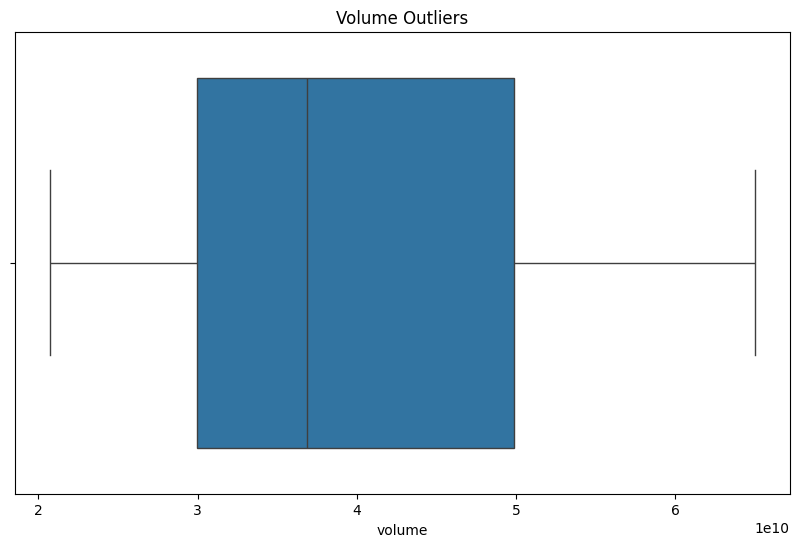

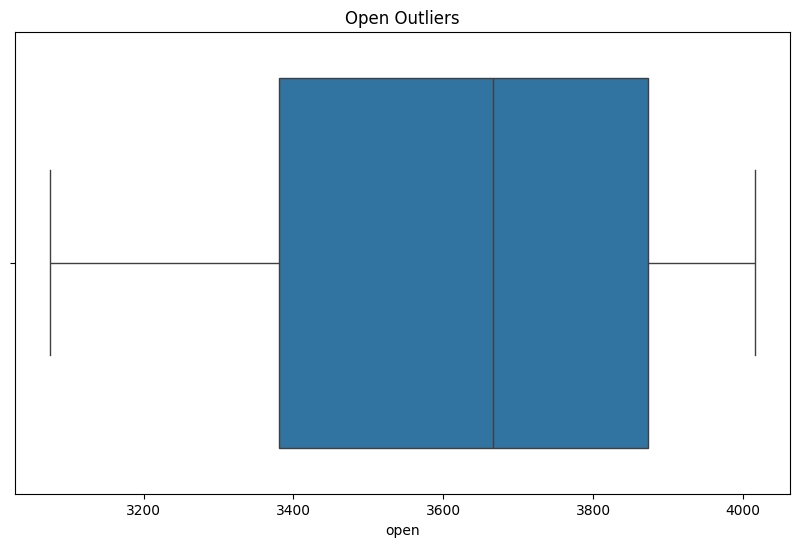

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df 

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in the 'volume' column
outliers_volume = detect_outliers_iqr(df, 'volume')
print("Outliers in 'volume':")
print(outliers_volume)

# Check for outliers in the 'open' column
outliers_open = detect_outliers_iqr(df, 'open')
print("\nOutliers in 'open':")
print(outliers_open)

# Visualize with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['volume'])
plt.title('Volume Outliers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['open'])
plt.title('Open Outliers')
plt.show()


Column: open
  Outliers Count: 0
  Lower Bound: 2644.040294076033
  Upper Bound: 4610.252474840668
  Outliers Indices: []

Column: high
  Outliers Count: 0
  Lower Bound: 2704.7758712622103
  Upper Bound: 4573.8111285289615
  Outliers Indices: []

Column: low
  Outliers Count: 0
  Lower Bound: 2704.7758712622103
  Upper Bound: 4573.8111285289615
  Outliers Indices: []

Column: close
  Outliers Count: 0
  Lower Bound: 2704.7758712622103
  Upper Bound: 4573.8111285289615
  Outliers Indices: []

Column: volume
  Outliers Count: 0
  Lower Bound: 79844143.25
  Upper Bound: 79721151461.25
  Outliers Indices: []



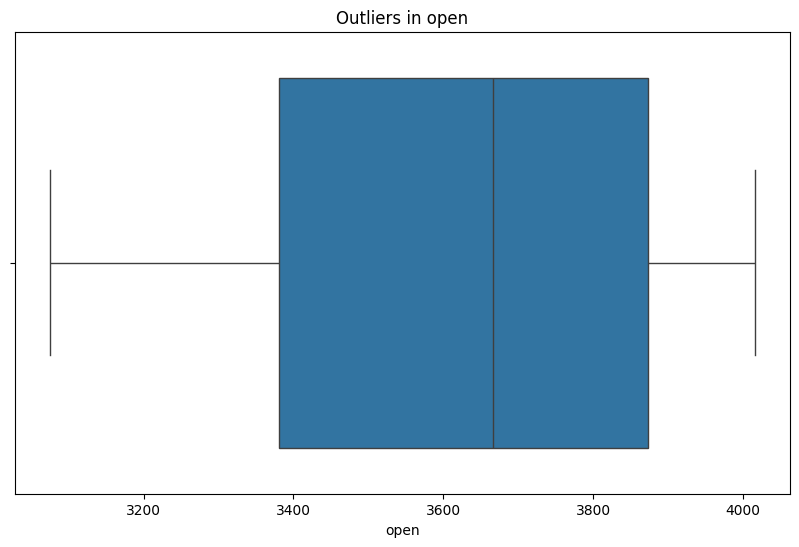

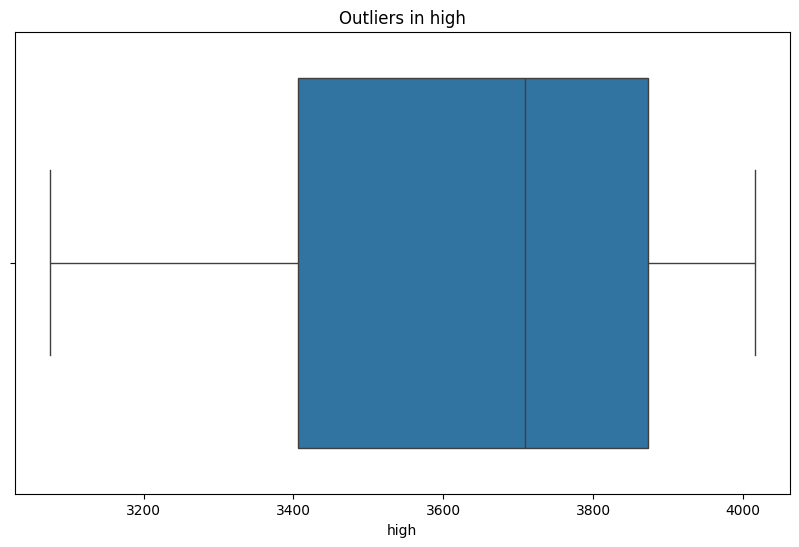

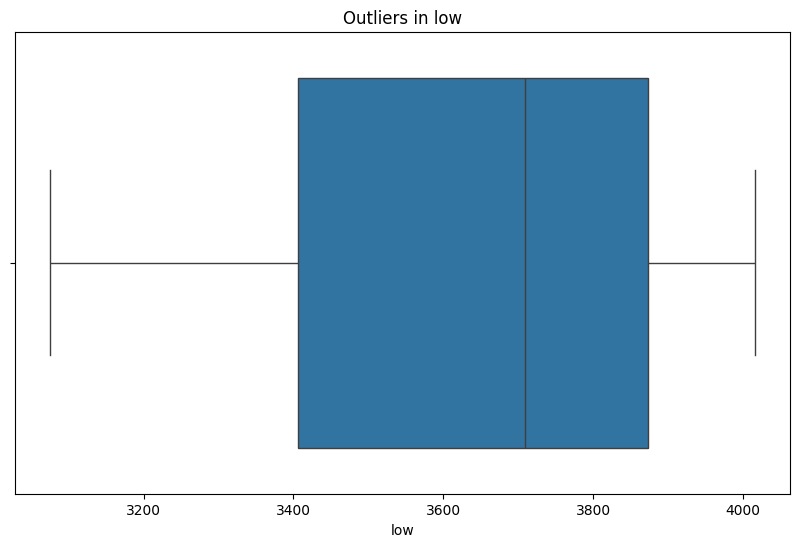

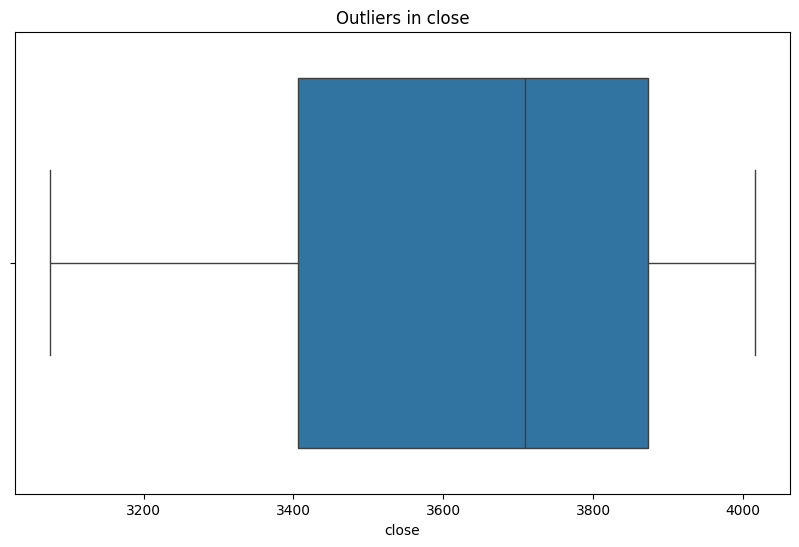

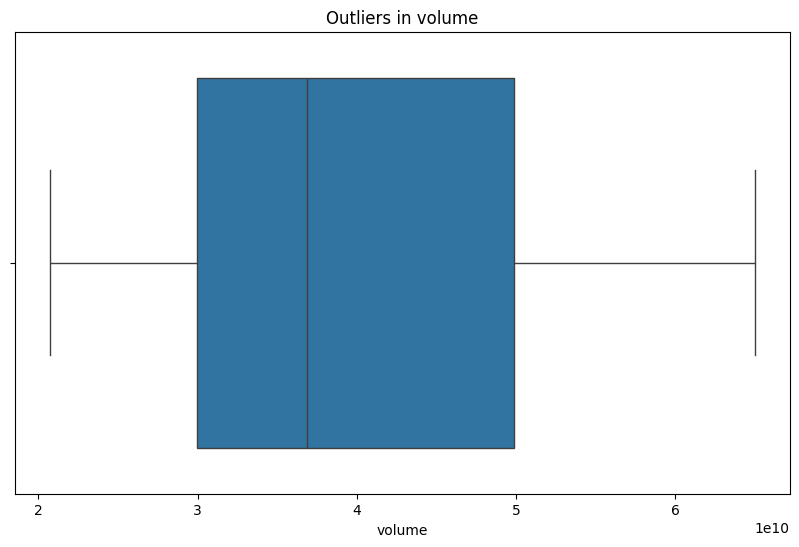

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_info = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_info[column] = {
            "outliers_count": len(outliers),
            "outliers_indices": outliers.index.tolist(),
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }

    return outlier_info

# Detect outliers for all numerical columns
outliers_info = detect_outliers_iqr(df)

# Display outlier information
for column, info in outliers_info.items():
    print(f"Column: {column}")
    print(f"  Outliers Count: {info['outliers_count']}")
    print(f"  Lower Bound: {info['lower_bound']}")
    print(f"  Upper Bound: {info['upper_bound']}")
    print(f"  Outliers Indices: {info['outliers_indices']}\n")

# Visualize each column's outliers using boxplots
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Outliers in {column}')
    plt.show()


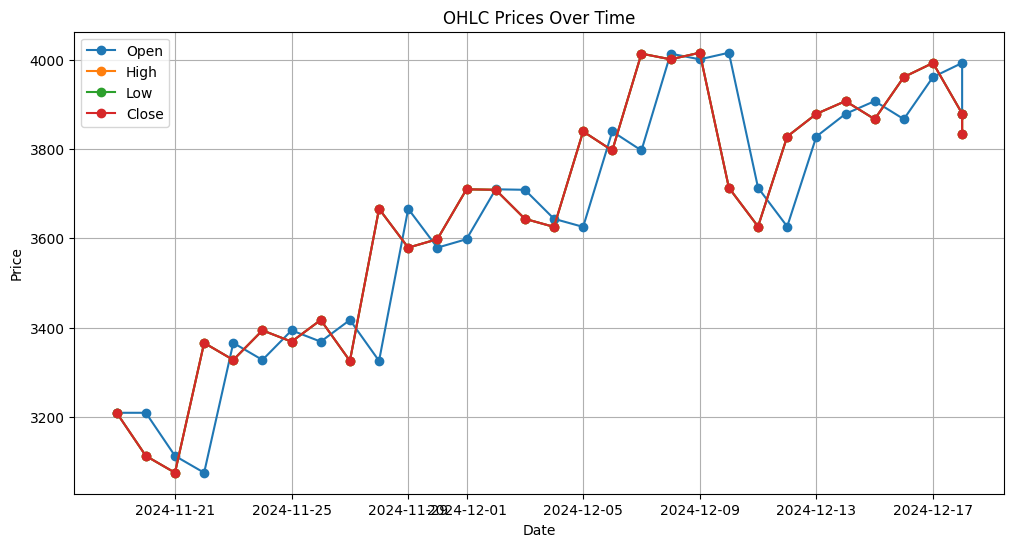

C:\Users\SREE GANESHA\AppData\Local\Temp\ipykernel_21384\3674858829.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['date'], y=df['volume'], palette="viridis")


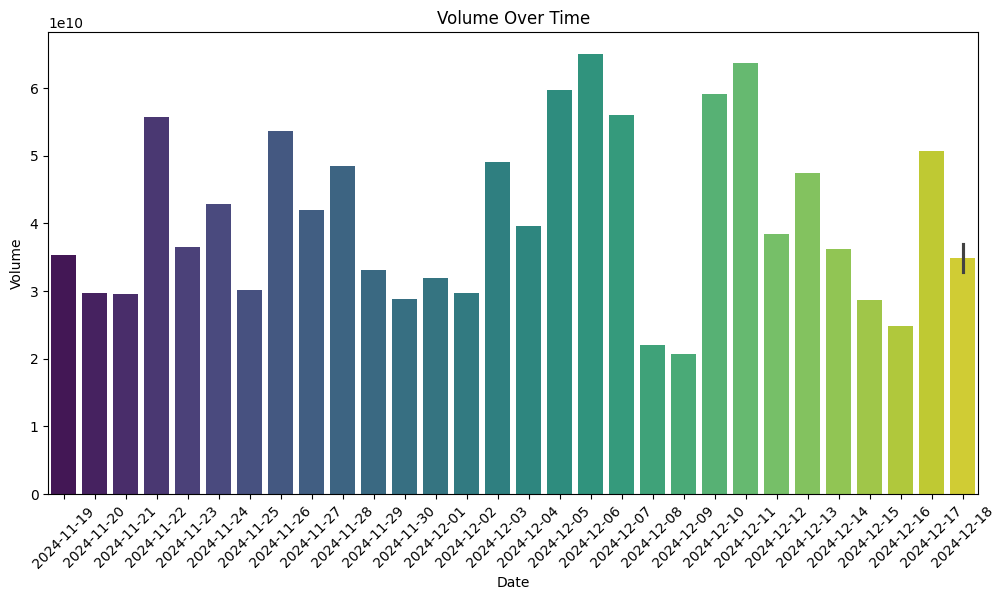

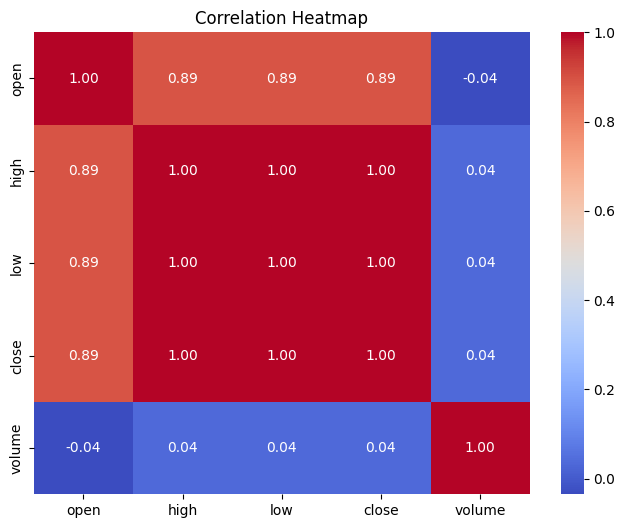

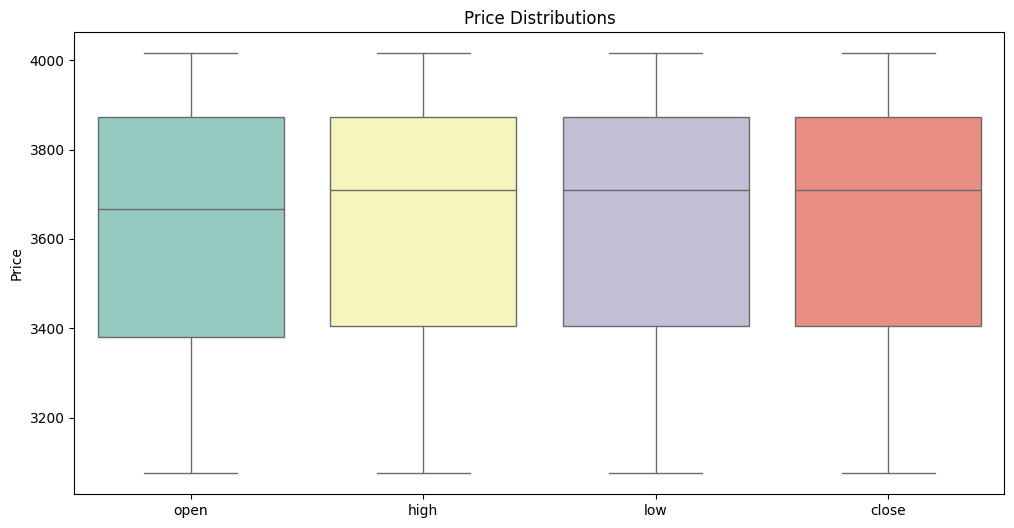

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Visualization 1: Line Plot for Open, High, Low, Close Prices
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['open'], label='Open', marker='o')
plt.plot(df['date'], df['high'], label='High', marker='o')
plt.plot(df['date'], df['low'], label='Low', marker='o')
plt.plot(df['date'], df['close'], label='Close', marker='o')
plt.title('OHLC Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Visualization 2: Bar Plot for Volume
plt.figure(figsize=(12, 6))
sns.barplot(x=df['date'], y=df['volume'], palette="viridis")
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation = df[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Visualization 4: Boxplot for Price Distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['open', 'high', 'low', 'close']], palette="Set3")
plt.title('Price Distributions')
plt.ylabel('Price')
plt.show()

In [15]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [16]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [17]:
# Rename 'timestamp' column to 'date'
df.rename(columns={'timestamp': 'date'}, inplace=True)

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)


In [18]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [19]:
df

,open,high,low,close,volume
date,,,,,
2024-11-19,3209.423907,3209.423907,3209.423907,3209.423907,35364731418
2024-11-20,3209.423907,3112.909801,3112.909801,3112.909801,29767245881
2024-11-21,3112.909801,3075.193857,3075.193857,3075.193857,29508936260
2024-11-22,3075.193857,3365.936972,3365.936972,3365.936972,55714132905
2024-11-23,3365.936972,3327.757195,3327.757195,3327.757195,36536922519
2024-11-24,3327.757195,3394.036962,3394.036962,3394.036962,42885423857
2024-11-25,3394.036962,3368.702762,3368.702762,3368.702762,30123422894
2024-11-26,3368.702762,3417.291224,3417.291224,3417.291224,53625394444
2024-11-27,3417.291224,3325.636533,3325.636533,3325.636533,41896722105


In [20]:
import pandas as pd

# Load the dataset (assuming df is already loaded as in the previous steps)
df = pd.read_csv('../data/ethereum_historical_data.csv')

# Rename the 'timestamp' column to 'date'
df.rename(columns={'timestamp': 'date'}, inplace=True)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Remove the time part from 'date' column (keep only the date)
df['date'] = df['date'].dt.date

# Convert 'volume' column to numeric format (removing e+ notation)
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')

# Check the data
print(df.head())


         date         open         high          low        close  \
0  2024-11-19  3209.423907  3209.423907  3209.423907  3209.423907   
1  2024-11-20  3209.423907  3112.909801  3112.909801  3112.909801   
2  2024-11-21  3112.909801  3075.193857  3075.193857  3075.193857   
3  2024-11-22  3075.193857  3365.936972  3365.936972  3365.936972   
4  2024-11-23  3365.936972  3327.757195  3327.757195  3327.757195   

         volume  
0  3.536473e+10  
1  2.976725e+10  
2  2.950894e+10  
3  5.571413e+10  
4  3.653692e+10  


In [21]:

# Convert 'volume' column to numeric format (removing e+ notation)
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')

# Set pandas display option to show large numbers without scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

# Check the data
print(df.head())

         date  open  high  low  close      volume
0  2024-11-19  3209  3209 3209   3209 35364731418
1  2024-11-20  3209  3113 3113   3113 29767245881
2  2024-11-21  3113  3075 3075   3075 29508936260
3  2024-11-22  3075  3366 3366   3366 55714132905
4  2024-11-23  3366  3328 3328   3328 36536922519


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    31 non-null     object 
 1   open    31 non-null     float64
 2   high    31 non-null     float64
 3   low     31 non-null     float64
 4   close   31 non-null     float64
 5   volume  31 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.6+ KB


In [23]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [24]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/ethereum_historical_data.csv')

# Strip any leading/trailing spaces in the column names
df.columns = df.columns.str.strip()

# Check the columns
print(df.columns)

# Rename 'timestamp' to 'date' if 'timestamp' exists in the column names
if 'timestamp' in df.columns:
    df.rename(columns={'timestamp': 'date'}, inplace=True)

# Convert 'date' to datetime format (only the date part, without time)
df['date'] = pd.to_datetime(df['date']).dt.date  # This converts to 'YYYY-MM-DD'

# Convert 'volume' to integer (removing scientific notation and converting to integer)
df['volume'] = df['volume'].apply(lambda x: int(float(x)))

# Check the first few rows
print(df.head())


Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
         date  open  high  low  close       volume
0  2024-11-19  3209  3209 3209   3209  35364731417
1  2024-11-20  3209  3113 3113   3113  29767245881
2  2024-11-21  3113  3075 3075   3075  29508936260
3  2024-11-22  3075  3366 3366   3366  55714132904
4  2024-11-23  3366  3328 3328   3328  36536922518


In [25]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [26]:
import mysql.connector
import pandas as pd

# Database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',        # Replace with your MySQL username
    'password': 'root',    # Replace with your MySQL password
    'database': 'timeseries'  # Replace with your database name
}

# Connect to the database
connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

# Alter the 'volume' column to BIGINT (if it already exists as INT)
alter_table_query = """
ALTER TABLE ethereum_data
MODIFY COLUMN volume BIGINT;
"""
cursor.execute(alter_table_query)
print("Column 'volume' changed to BIGINT successfully.")

# Now let's load the CSV file into pandas
df = pd.read_csv('../data/ethereum_historical_data.csv')

# Convert 'date' to datetime format and ensure it's only the date part (YYYY-MM-DD)
df['date'] = pd.to_datetime(df['date']).dt.date

# Convert 'volume' to integer type (after handling any scientific notation)
df['volume'] = df['volume'].apply(lambda x: int(float(x)))

# Check for NaN values and handle them (drop rows with NaN or fill them)
df = df.dropna()  # Drop rows with NaN values, or use df.fillna(value) to fill NaN with a value

# Filter required columns from DataFrame
df_to_insert = df[['open', 'high', 'low', 'close', 'volume', 'date']]

# Insert data from DataFrame into the table
insert_query = """
INSERT INTO ethereum_data (open, high, low, close, volume, date)
VALUES (%s, %s, %s, %s, %s, %s)
"""
data_to_insert = df_to_insert.values.tolist()  # Convert filtered DataFrame to list of tuples
cursor.executemany(insert_query, data_to_insert)

# Commit the transaction and close the connection
connection.commit()
print(f"Data inserted into table 'ethereum_data' successfully.")

# Close connection
cursor.close()
connection.close()


Column 'volume' changed to BIGINT successfully.


KeyError: 'date'

In [27]:
df


,timestamp,open,high,low,close,volume
0,2024-11-19 05:30:00,3209,3209,3209,3209,35364731418
1,2024-11-20 05:30:00,3209,3113,3113,3113,29767245881
2,2024-11-21 05:30:00,3113,3075,3075,3075,29508936260
3,2024-11-22 05:30:00,3075,3366,3366,3366,55714132905
4,2024-11-23 05:30:00,3366,3328,3328,3328,36536922519
5,2024-11-24 05:30:00,3328,3394,3394,3394,42885423857
6,2024-11-25 05:30:00,3394,3369,3369,3369,30123422894
7,2024-11-26 05:30:00,3369,3417,3417,3417,53625394444
8,2024-11-27 05:30:00,3417,3326,3326,3326,41896722105
9,2024-11-28 05:30:00,3326,3666,3666,3666,48465294233


In [28]:
# Convert 'timestamp' to datetime and extract only the date part (YYYY-MM-DD)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date

# Rename 'timestamp' to 'date'
df.rename(columns={'timestamp': 'date'}, inplace=True)

# Check the result
print(df.head())

         date  open  high  low  close      volume
0  2024-11-19  3209  3209 3209   3209 35364731418
1  2024-11-20  3209  3113 3113   3113 29767245881
2  2024-11-21  3113  3075 3075   3075 29508936260
3  2024-11-22  3075  3366 3366   3366 55714132905
4  2024-11-23  3366  3328 3328   3328 36536922519


In [29]:
import mysql.connector
import pandas as pd

# Database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',        # Replace with your MySQL username
    'password': 'root',    # Replace with your MySQL password
    'database': 'timeseries'  # Replace with your database name
}

# Connect to the database
connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

# Alter the 'volume' column to BIGINT (if it already exists as INT)
alter_table_query = """
ALTER TABLE ethereum_data
MODIFY COLUMN volume BIGINT;
"""
cursor.execute(alter_table_query)
print("Column 'volume' changed to BIGINT successfully.")

# Now let's load the CSV file into pandas
df = pd.read_csv('../data/ethereum_historical_data.csv')

# Convert 'date' to datetime format and ensure it's only the date part (YYYY-MM-DD)
df['date'] = pd.to_datetime(df['date']).dt.date

# Convert 'volume' to integer type (after handling any scientific notation)
df['volume'] = df['volume'].apply(lambda x: int(float(x)))

# Check for NaN values and handle them (drop rows with NaN or fill them)
df = df.dropna()  # Drop rows with NaN values, or use df.fillna(value) to fill NaN with a value

# Filter required columns from DataFrame
df_to_insert = df[['open', 'high', 'low', 'close', 'volume', 'date']]

# Insert data from DataFrame into the table
insert_query = """
INSERT INTO ethereum_data (open, high, low, close, volume, date)
VALUES (%s, %s, %s, %s, %s, %s)
"""
data_to_insert = df_to_insert.values.tolist()  # Convert filtered DataFrame to list of tuples
cursor.executemany(insert_query, data_to_insert)

# Commit the transaction and close the connection
connection.commit()
print(f"Data inserted into table 'ethereum_data' successfully.")

# Close connection
cursor.close()
connection.close()


Column 'volume' changed to BIGINT successfully.


KeyError: 'date'

In [30]:
import pandas as pd

# Load your dataset (replace with the actual file path)
df = pd.read_csv('../data/ethereum_historical_data.csv')

# Convert 'timestamp' to datetime and extract only the date part (YYYY-MM-DD)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date

# Rename 'timestamp' to 'date'
df.rename(columns={'timestamp': 'date'}, inplace=True)

# Check the result
print(df.head())


         date  open  high  low  close      volume
0  2024-11-19  3209  3209 3209   3209 35364731418
1  2024-11-20  3209  3113 3113   3113 29767245881
2  2024-11-21  3113  3075 3075   3075 29508936260
3  2024-11-22  3075  3366 3366   3366 55714132905
4  2024-11-23  3366  3328 3328   3328 36536922519


In [31]:
df

,date,open,high,low,close,volume
0,2024-11-19,3209,3209,3209,3209,35364731418
1,2024-11-20,3209,3113,3113,3113,29767245881
2,2024-11-21,3113,3075,3075,3075,29508936260
3,2024-11-22,3075,3366,3366,3366,55714132905
4,2024-11-23,3366,3328,3328,3328,36536922519
5,2024-11-24,3328,3394,3394,3394,42885423857
6,2024-11-25,3394,3369,3369,3369,30123422894
7,2024-11-26,3369,3417,3417,3417,53625394444
8,2024-11-27,3417,3326,3326,3326,41896722105
9,2024-11-28,3326,3666,3666,3666,48465294233


In [33]:
 #Save the modified DataFrame to a new CSV file
df.to_csv('ethereum modified_data.csv', index=False)

print("Modified CSV saved as 'ethereum modified_data.csv'!")

Modified CSV saved as 'ethereum modified_data.csv'!


In [34]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine

# Load your data (replace with your actual CSV file path)
df = pd.read_csv('../data/ethereum modified_data.csv')

# Example MySQL connection details - adjust as needed
username = 'root'
password = 'root'
host = 'localhost'
database = 'timeseries'
table_name = 'ethereum_data'

# Create an SQLAlchemy engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

# Insert data into the SQL table (replace 'your_table_name' with your actual table name)
df.to_sql(name=table_name, con=engine, if_exists='append', index=False)

# Ensure that the data has been committed
print("Data inserted successfully!")


Data inserted successfully!
